# Homework 1 - Jakub Krajewski

### Imports and data loading

In this section I load the data from one of the classification datasets. I split the dataset into train and test part.

In [16]:
import pandas as pd
import numpy as np
import sklearn.model_selection
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

df = pd.read_csv('heart.csv')
X = df.iloc[:, :13]
y = df.iloc[:, 13]
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y)

### Training

First, I train a simple Random Forest Classifier (with default hyperparameters). For comparison, I also train a Gradient Boosting model. Both of them will be compared in the next section.

In [3]:
forest_cls = RandomForestClassifier()
forest_cls.fit(X_train, y_train)
y_predict_forest = forest_cls.predict(X_test)

boost_cls = GradientBoostingClassifier()
boost_cls.fit(X_train, y_train)
y_predict_boost = boost_cls.predict(X_test)

### Comparison

In this section I will assess the both of the trained models on test dataset. First, let's check whether the test dataset is balanced in terms of classes.

In [7]:
print(f"Number of test samples with target 0: {y_test[y_test == 0].shape[0]}")
print(f"Number of test samples with target 1: {y_test[y_test == 1].shape[0]}")

Number of test samples with target 0: 35
Number of test samples with target 1: 41


We can see that the test dataset is approximately balanced.

Now, let's check the simplest and most intuitive measure for evaluating classification models - accuracy. 

In [27]:
# accuracy for random forest
correct = np.count_nonzero((y_predict_forest == y_test).to_numpy())
correct / y_test.shape[0]

0.7763157894736842

For the Random Forest Classifier, the accuracy is approximately 0.78 is certainly above random guessing (we deal with binary classification problem here). However, it is also not exceptionally high.

In [29]:
# accuracy for boosting
correct = np.count_nonzero((y_predict_boost == y_test).to_numpy())
correct / y_test.shape[0]

0.7631578947368421

The accuracy of the second classifier is comparable, but slightly lower, approximately 0.76. This is also not a very good result. However, we need to bear in mind that both of the models were traind on just 227 examples. This may not be enough to catch all of the complex mechanisms in the medical data and be able to predict heart attack. Also, the number of features may not be sufficient. It's also important to note, that the models were trained with default hyperparameters and without any feature engineering, which may also improve the results.

Next, I will compare the ROC curves for both of the models. In general, the ROC curve is a more informative metric than accuracy for evaluating the performance of a binary classification model. 

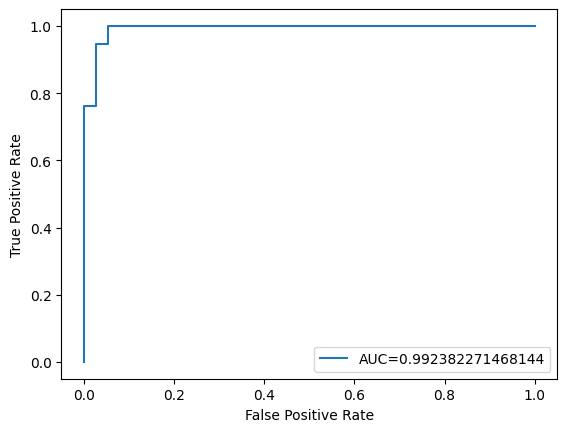

In [19]:
#define metrics
y_pred_proba = forest_cls.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

The ROC curve (with AUC calculation) can drive us to slightly different conclusions. It is the plot of True Positive Rate against False Positive Rate. This curve can be interpreted as a trade-off between sensitivity and specificity. The higher the AUC (area under curve), the better the model is at distinguishing between classes. Here we can see that the model seems to be far from random guessing (diagonal). In fact, the results seem to be good on the test set, the AUC is approximately 0.99. This (with a slightly lower accuracy) indicates that the model is able to correctly identify the positive samples at a higher rate than chance, even though possibly with a significant number of false positives.

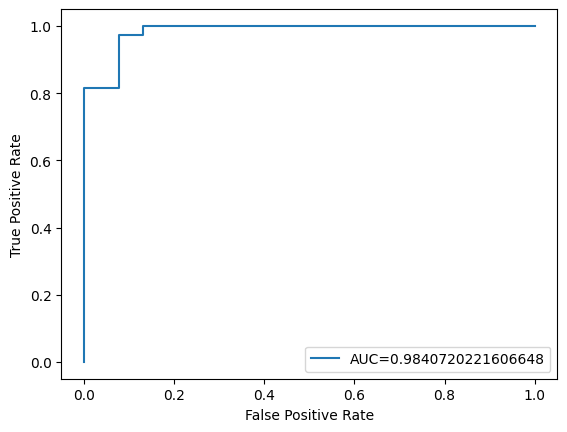

In [29]:
#define metrics
y_pred_proba = boost_cls.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Again, we can see that the Gradient Boosing model performs slightly worse. However, the ROC curve looks good and also the AUC metric is high (close to 0.98). Again, the model performs better when we focus on true positive and false positive examples. Again, we can conclude that the model is able to identify the positive samples quite good. One strategy to improve the accuracy of the model would be to use the `predict_proba` method and set a different threshold for the positive class.